# Compuational Neuroscience Final Project

## Background:
I spent my past summer working in the bioinformatics group of a small biotech company called Cell Signaling Technology. Our company focuses on the development of research antibodies, and much of the software I used involved structural modelling, binding-epitope prediction, binding-affinity prediction, etc. Many of these applications were built by implementing by pre-trained neural nets that could "map" antibody residue sequence to binding  site, structural features, etc.

## Research Proposal:

Although I used these machine-learning-based software packages, I've never done any actual machine learning coding myself. As a first step into machine learning, I attempted to perform a *somewhat* simple task involving antibody sequence processing:

- Identify the species of an antibody, based on the nucleotide sequence of its light and heavy chains.

It should be noted that there are no existing algorithms, to my knowledge, that attempt to identify the species from which an antibody sequence originated. This is probably because human researchers can do it pretty easily... nevertheless, I think this would be an interesting exercise. As inputs, I am considering looking into the features that Clusal Omega uses to determine sequence alignment, and seeing if using some of the insights from clustal omega could help build a more efficient neural net (to my untrained eye, testing the sequence alignment of two antibodies is the easiest way to see if they're part of the same species... two of the same species will often have ~%70 identity, whereas two of different species will often land around ~30-40% identity).

## Objectives of this project

- Prior to completing this project, I had never used any of the python libraries you see me using below. Thus, one of the most important objectives here was to begin introducing myself to machine learning through code, and to become familiar with some of the state-of-the-art libraries used to do that. I spent about 20-30 hours taking an udemy course, "Complete Guide to TensorFlow for Deep Learning with Python", and learned the basics of the following libraries:
    - tensorflow
    - pandas
    - numpy
    - scikitlearn
    - matplotlib
    
- A second objective of this work was to become familiar with how exactly to apply a knowledge of machine learning to code itself- to translate a conceptual understanding into a technical skill. To some extent, I believe that I've made good progress in this area.

- Thirdly, I hoped this project would give me a good understanding of how I might apply machine learning to real world data. In this case, I attempted to conjoin a domain-specific knowledge of antibody sequences and structure with a more general understanding of machine learning. Performing this exercise of combining my knowledge on a data set with a knowledge of machine learning will help me to reiterate this process on other forms of data in the time ahead of me. 

## Project

The project itself was originally aimed at identifying the species of origin for an antibody sequence using sequencing data alone. However, because this is a fairly difficult task, and working with data such as images or sequence data requires a more technically complicated recurrent neural net, I've decided to break the project into two pieces.

1. Identity the species of origin from which an antibody originated using a simple linear classifier or densely connected neural net, and continuous data points indicating various features about the antibody.

2. Attempt to classify the antibody's species of origin using only sequencing information. Specifically, this sequence information will include the amino acid sequence of the antibody's light chain, and the sequences of the it's three complimentary determining regions.

## Background

Although additionally information about each of the above sub-projects will be provided further down in the code, in order to understand the intent behind the code, a little background on antibodies in general and their place in this project specifically is neccessary. To cover all my ground, I'm going to assume zero prior knowledge on the subject for anyone reviewing this ipython notebook.

#### Antibodies Background:

Antibodies(Ab), or immunoglobulins (Ig) are immune proteins, generated by nearly countless forms of species, ranging from mammals all the way back to cartilagenous fishes [Schluter et. al, 1977](https://www.ncbi.nlm.nih.gov/pubmed/9386351). In all cases, the primary function of an antibody is to attempt to bind to and neutralize pathogens. When an antibody binds to its target, it can perform one of two things:
- Tag the protein, thus signaling the rest of the immune system of a potential intruder
- Directly neutralize the target, in the case that the antibody has bound to an area on the pathogen that is biologically relevant and/or necessary for the pathogen's survival

Antibodies thus form a critical piece of the body's immune system. The body develops antibodies in mass quantities to target a wide variety of pathogenic or potentially pathogenic proteins and ligands. By doing so, the body is typically able to create a subset of antibodies that can successfully bind to the non-native (or potentially pathogenic) protein that it is attempting to target. 

Further, once researchers realized the power of antibodies in the human body, they began to utilize antibodies for new tasks. Today, antibodies produced under the supervision of researchers from pharma, biotech, and academic research alike are used for a variety of tasks. Commercially produced antibodies now find therapeutic uses, and are especially useful for patients whose immune systems are not well-equipped to fight an ailment. Keytruda and Optivo, for example, use antibodies to fight a range of advanced cancers. In the case of cancer, the body's immune system does not often recognize cancer cells, causing the disease to spread. Antibody drugs can help to counteract this issue by triggering an immune response. Further, antibodies can be used in therapeutics to directly attack cancers or other pathogens by binding to a functionally critical location and performing neutralization directly. Finally, in addition to all of these therapeutics, antibodies can be used for research... for example, by enabling researchers to tag proteins they are studying in a tissue specimen with a florescent tag or a radioactive tag. These tags can help researchers to visualize and collect data on proteins they are studying.

##### Structure

To understand how exactly how the antibody has seen such enormous success, however, one has to take a look at its structure, and examine how the body introduces genetic variance. Antibodies express a unique Y-shape, as follows.

![Antibody Shape](https://www.immunology.org/sites/default/files/Generation-of-B-cell-antibody-diversity-Figure-1.png)

Taking a look at this Y shape, one can identify the various regions of an antibody. First of all, the antibody has two different "chains", meaning chains of ammino acid - the light chain and the heavy chain. Further, each of these chains can be broken down into two parts - the constant region, and the variable region. For a given antibody type, the constant region remains exactly the same. Two antibodies targeting entirely different pathogens will express the same constant regions nonetheless. The true power of the antibody, however, rests in the variable region- this is the region that actually binds to a target pathogen. 

To build the variable region, the body's B cells randomly pull from a gene pool in order to introduce genetic variance. The amino acid sequence of the variable region, therefore, is unique to each specific antibody. The body can generate virtually endless amino acid sequences in the varible region of the antibodies it produces; therefore, when these B cells are attempting to generate an antibody that can successfully bind a pathogen, they can merelly mass-produce antibodies, introducing genetic variance each time, until a successfully binding antibody emerges. Taking this approach results in an extremely high probability that the body can bind a given pathenogen.

#### Application to Project

Because of the genetic variance of these variable regions, there are no easy ways to perform any kind of analysis on them without data-driven techniques. In the case of this project, we will be feeding an algorithm only the sequence of the variable region of the antibody light chain. In addition, to provide a little extra data, we will be providing the algorithm data about the substructure of this light chain. To be more specific, all variable regions can be broken down into a couple different pieces, namely the complimentary-determining (CDR) regions, and the framework regions. The framework regions are more genetically stable than the CDR regions, so the CDR regions are really the  piece of the antibody that is primarily responsible for binding specificity. CDRs and framworks, in any given antibody, are always found in the antibody sequence in the following order:

- Framework 1, CDR1, Framework 2, CDR2, Framework 3, CDR3, Framework 4

Therefore, to provide the algorithm with additional data, we will be providing it the sequences of the CDR1,2, and 3 that form a piece of its variable light chain.

In this project, we will be feeding the algorithm mouse and human antibody sequences only, and attempting to enable the algorithm to identity the species using this sequence data.

Although this may seem like an impossible task, given the genetic variability/ randomness of the variable region, but keep in mind that each species is pulling from a different set of genes to create this variabilty. Therefore, across species, similar sequence motifs are expressed. Having this knowledge, we will attempt to see if our algorithm can identify some of these motifs, and make a distinction based on species.

## Downfalls:

1. The dataset I used, the Kabat antibody dataset, is from the late 1990s, and is formatted very poorly for usage in machine learning. In addition, there were numerous empty datafields, forcing me to cut my dataset to a mere 1000 sequences

2. As a result of this, an unbelievable ammount of my code is pure data preparation, and my voyage into machine learning here is pretty unreasonable

3. Currently, my reccurent neural net using sequence data alone cannot run... although I continue to work on getting it to go.

### Test efficacy of GPU

In [1]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


### Begin Data Preprocessing

The data to be used in this project derives from the Kabat sequence database, the largest database of antibody sequences by protein sequence. This dataset includes multiple species and approx. 50,000 entires... however, many of these entries include incomplete data. Further, the database is neither easy to find nor easy to work with.

To simplify things, I've done some preprocessing on the database to attain the csv files you see below in this notebook, but will be leveraging the data formatting power of pandas to remove any incomplete entries, format columns etc.

For the first machine learning task, I will be using the follow data points:

- Length CDRL1
- Length CDRL2
- Length CDRL3
- A given sequence's % identity match, on average, with other human antibody sequences
- % identity match, on average, with other mouse antibody sequences
- % identity of the sequence's best single match with any human antibody in our database
- % identity of the sequence's best single match with any mouse antibody in our database

In this inital machine learning task, I won't be using the actual antibody sequence data itself, as this would require a convolutional neural net and a little more code. We'll leave that for later. For now, all I'll be doing with the antibody light chain sequences is generating identity matrixes-- indicating how similar a given antibody chain is to the antibody chains coming from other species.

In order for our algorithm to distinguish between species, it will only need to understand the relationship between species-specific sequence identity, and the length of the CDRs.

Thus, for this task, all data entries lacking sequence or CDR length data will be removed.

In [3]:
import pandas as pd
import numpy as np
import os as os

In [11]:
def scrap_data(in_file,out_file):
    with open(in_file,"r") as input:
        with open(out_file,"w") as output:
            for line in input:
                if not "?" in line and not "X" in line:
                    output.write(line)

In [12]:
scrap_data("./data/mouse_human.csv","./data/mouse_human_data.csv")

In [10]:
with open("./data/mouse_human.csv","r") as input:
    with open("./data/mouse_human_data.csv","w") as output:
        for line in input:
            if not "?" in line and not "X" in line:
                output.write(line)

In [22]:
# Read in csv file
mAbs = pd.read_csv('./data/mouse_human_data.csv')

In [23]:
mAbs.head()

,L1,L2,L3,LengthL1,LengthL2,LengthL3,Light,Heavy,Source
0,RASQSVSSSYLA,GASSRAT,QQYGSSPSIT,12,7,10,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,HUMAN
1,TGTSSDVGGYKYVS,DVTNRPS,SSYAGAQSLV,14,7,10,QSVLTQPASVSGSPDQSITISCTGTSSDVGGYKYVSWYQQHPDKAP...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLE...,HUMAN
2,ASSTGAVTTGYYPN,STSNKHS,LLYYGGA,14,7,7,QTVVTQQPSLTVSPGGTVTLTCASSTGAVTTGYYPNWFQQKPGQAP...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRQAPGQGLE...,HUMAN
3,KSSQSLLYSSNNKNYLA,WASTRES,QQYYSTPPM,17,7,9,DIVMTQSPDSLAVSLGERATINCKSSQSLLYSSNNKNYLAWYQQKP...,QVQLVQSGAEVKKPGASVKVSCEASGYTFTGHYMHWVGQAPGQGLE...,HUMAN
4,RASQSIGSFLH,AASSLQS,QQSYSTLYT,11,7,9,DIQMTQSPSSLSASVGDRVTITCRASQSIGSFLHWYQQKPGKGPKL...,QVQLVQSGAEVKKPGASVKVSCKTSGYTFVAYYVHWVRQAPGQGLQ...,HUMAN


### Drop Unneccessary Data Values:

In [24]:
mAbs = mAbs.drop(['Heavy'],axis=1)

CDR2s are always 7 residues in length across this entire dataset, as is extremely common for mouse and human antibodies. Therefore, this data point is not useful to us and should be dropped out as well

In [25]:
mAbs = mAbs.drop(['LengthL2'], axis=1)

In [26]:
mAbs.head()

,L1,L2,L3,LengthL1,LengthL3,Light,Source
0,RASQSVSSSYLA,GASSRAT,QQYGSSPSIT,12,10,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,HUMAN
1,TGTSSDVGGYKYVS,DVTNRPS,SSYAGAQSLV,14,10,QSVLTQPASVSGSPDQSITISCTGTSSDVGGYKYVSWYQQHPDKAP...,HUMAN
2,ASSTGAVTTGYYPN,STSNKHS,LLYYGGA,14,7,QTVVTQQPSLTVSPGGTVTLTCASSTGAVTTGYYPNWFQQKPGQAP...,HUMAN
3,KSSQSLLYSSNNKNYLA,WASTRES,QQYYSTPPM,17,9,DIVMTQSPDSLAVSLGERATINCKSSQSLLYSSNNKNYLAWYQQKP...,HUMAN
4,RASQSIGSFLH,AASSLQS,QQSYSTLYT,11,9,DIQMTQSPSSLSASVGDRVTITCRASQSIGSFLHWYQQKPGKGPKL...,HUMAN


In [27]:
len(mAbs.index)

1106

### Remove Missing Data
- Remove any entries without sequence data, using pandas dropna function
(Missing entries default to Nan in pandas. Dropna removes any rows with missing entires)

- Eliminate sequences with and CDR Lengths listed as zero, as this indicates missing data

In [28]:
mAbs = mAbs.dropna()

In [29]:
mAbs = mAbs[mAbs.LengthL1 != 0]
mAbs = mAbs[mAbs.LengthL3 != 0]

### Generate fasta sequences for alignment later on:
 - Later in the generation of the dataset, we'll need to create a percentage identity matrix using a program called clustal omega. This information will enable us to determine how well a given antibody Fv sequence matches with sequences from other species

In [30]:
mAbs['Light'].to_csv('./data/seqs', sep=' ', index=False, header=False)

In [31]:
def fasta_gen(sequence_file):
    i = 0
    out_file = sequence_file + ".fasta"
    with open(sequence_file,"r") as input:
        with open(out_file,"w") as output:
            for line in input:
                line = ">sequence" + str(i) + "\n" + line
                output.write(line)
                i += 1
    os.remove(sequence_file)

In [32]:
fasta_gen('./data/seqs')

### Generate the identity matrix and species similarity:

This next piece of data generation involes determining how similar a given sequence is to other sequences generated by its species. In order to assign a metric to each sequence for a dataset, indicating how similar it is to either the mouse species or the human species, we will use the following procedure:

1. We have now generated a set of light chain sequences for every antibody in our dataset. Therefore, we are now able to use tools for fasta processing

2. The tool clustal omega, a protein sequence alignment tool created by the European Bioinformatics Institute. The tool, if fed a fasta file of sequences, will individually align and compare each sequence in the file to every other sequence

3. The tool is able to generate an identity matrix, where one sequence's similarity to another's is expressed as a %match (i.e. how many of the residues match between the two sequences after a proper alignment has been made. In this identity matrix, an percentage entry at row1 column5 indicates sequence 1's similiarity 

4. Because this tool is extremely computationally expensive, we are going to run the tool on a server I rented out on the cloud to perform this project. 

`clustalo --threads=$(nproc) --in seqs.fa --full --distmat-out=percents.csv --percent-id --out seq_identity`

5. Percents file defaults to using spaces as the delimiter... convert the `percents` file into a true csv file using sed command to replace spaces with commas. Now we are ready to process with python


In [22]:
# To give you an idea of how clustal is aligning the sequences and assigns % identity
# you can visualize how it introduces gaps to help align sequences.
# Below are some of the sequences from our dataset that clustal aligned for us:

from IPython.display import display

def Fasta(data='f'):
    bundle = {}
    bundle['application/vnd.fasta.fasta'] = data
    bundle['text/plain'] = data
    display(bundle, raw=True)

Fasta(""">sequence0
--EIVLTQSPGTLSLSPGERATLSCRASQSVSSS---------YLAWYQQKPGQAPRLLI
YG----ASSRATGIPDRFSGSGS--G--------TDFTLTISRLEPADFAVYYCQQYGS-
S-P-SITFGQGTRLEIKR--
>sequence1
--QSVLTQ-PASVSGSPDQSITISCTGTSSDVGGY-------KYVSWYQQHPDKAPKVMI
YD----VTNRPSGGSNRFSGSKS--G--------NTASLTISGLQAEDEADYYCSSYAGA
QS-L-VFG-GGTKLTVLG--
>sequence2
--QTVVTQ-QPSLTVSPGGTVTLTCASSTGAVTTG-------YYPNWFQQKPGQAPRALI
YS----TSNKHSWTPARFSGSLL--G--------GKAALTLSGVQPEDEAEYFCLLYYGG
A-------------------
>sequence3
--DIVMTQSPDSLAVSLGERATINCKSSQSLLYSSNNK----NYLAWYQQKPGQPPKLLI
YW----ASTRESGVPDRFSGSGS--G--------TDFTLTISSLQAEDVAVYYCQQYYS-
T-P--PMFGQGTKVEIKRT-
>sequence4
--DIQMTQSPSSLSASVGDRVTITCRASQ------SIG----SFLHWYQQKPGKGPKLLI
SA----ASSLQSGVPSRFSGSGS--G--------TDFTLTISSLQPEDFATYYCQQSYST
--L--YTFGQGTKLEIKR--
>sequence5
--EIVLTQSPGTLSLSPGERATLSCRASQSISSS---------FLAWYQQKVGQAPRLLI
YG----ASSRATGIPDRFSGSGS--G--------TDFTLTISRLEPEDFAVYYCQQYGS-
S-P--LTFGGGTKVEIKR--
""")

>sequence0
--EIVLTQSPGTLSLSPGERATLSCRASQSVSSS---------YLAWYQQKPGQAPRLLI
YG----ASSRATGIPDRFSGSGS--G--------TDFTLTISRLEPADFAVYYCQQYGS-
S-P-SITFGQGTRLEIKR--
>sequence1
--QSVLTQ-PASVSGSPDQSITISCTGTSSDVGGY-------KYVSWYQQHPDKAPKVMI
YD----VTNRPSGGSNRFSGSKS--G--------NTASLTISGLQAEDEADYYCSSYAGA
QS-L-VFG-GGTKLTVLG--
>sequence2
--QTVVTQ-QPSLTVSPGGTVTLTCASSTGAVTTG-------YYPNWFQQKPGQAPRALI
YS----TSNKHSWTPARFSGSLL--G--------GKAALTLSGVQPEDEAEYFCLLYYGG
A-------------------
>sequence3
--DIVMTQSPDSLAVSLGERATINCKSSQSLLYSSNNK----NYLAWYQQKPGQPPKLLI
YW----ASTRESGVPDRFSGSGS--G--------TDFTLTISSLQAEDVAVYYCQQYYS-
T-P--PMFGQGTKVEIKRT-
>sequence4
--DIQMTQSPSSLSASVGDRVTITCRASQ------SIG----SFLHWYQQKPGKGPKLLI
SA----ASSLQSGVPSRFSGSGS--G--------TDFTLTISSLQPEDFATYYCQQSYST
--L--YTFGQGTKLEIKR--
>sequence5
--EIVLTQSPGTLSLSPGERATLSCRASQSISSS---------FLAWYQQKVGQAPRLLI
YG----ASSRATGIPDRFSGSGS--G--------TDFTLTISRLEPEDFAVYYCQQYGS-
S-P--LTFGGGTKVEIKR--


In [23]:
import csv

In [24]:
id_matrix = np.array(list(csv.reader(open("./data/percents.csv", "r"), delimiter=","))).astype("str")

In [25]:
# convert to percentages only, then change string representation of values to floats
id_matrix = id_matrix[:,1:].astype(np.float)

In [26]:
id_matrix.shape
# Extra column comes from the sequence name

(1106, 1106)

In [27]:
# First entries in database are human. Get number of entries for demonstration
len(mAbs[mAbs.Source == 'HUMAN'])

395

In [28]:
num_humans = len(mAbs[mAbs.Source == 'HUMAN'])
num_mice = len(mAbs[mAbs.Source == 'MOUSE'])
matches = open('./data/matches.csv','w')

matches.write("Avg-Human-Match,Best-Human-Match,Avg-Mouse-Match,Best-Mouse-Match\n")

for i in range(0,np.shape(id_matrix)[0]):
    
    human_match = 0
    mouse_match = 0
    best_human_match = 0
    best_mouse_match = 0
    
    for j in range(0,np.shape(id_matrix)[1]):
        
        if j < num_humans and id_matrix.item((i,j)) != 100.0 :
            human_match += id_matrix.item((i,j))
            
            if id_matrix.item((i,j)) > best_human_match:
                best_human_match = id_matrix.item((i,j))
            
        
        elif id_matrix.item((i,j)) != 100 :
            mouse_match += id_matrix.item((i,j))
            
            if id_matrix.item((i,j)) > best_mouse_match:
                best_mouse_match = id_matrix.item((i,j))
            
    human_match /= num_humans -1 
    mouse_match /= num_mice -1 
        
    matches.write(str(human_match) + "," + str(best_human_match) + "," + \
                  str(mouse_match) + "," + str(best_mouse_match) + '\n')

matches.close()

In [29]:
match_vals = pd.read_csv('./data/matches.csv')

## Add everything into prexisting dataframe:

In [30]:
mAbs['AvgHumanMatch'] = match_vals['Avg-Human-Match']
mAbs['BestHumanMatch'] = match_vals['Best-Human-Match']
mAbs['AvgMouseMatch'] = match_vals['Avg-Mouse-Match']
mAbs['BestMouseMatch'] = match_vals['Best-Mouse-Match']

In [31]:
mAbs.head()

,L1,L2,L3,LengthL1,LengthL3,Light,Source,AvgHumanMatch,BestHumanMatch,AvgMouseMatch,BestMouseMatch
0,RASQSVSSSYLA,GASSRAT,QQYGSSPSIT,12,10,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,HUMAN,58.033865,98.958333,54.246754,66.972477
1,TGTSSDVGGYKYVS,DVTNRPS,SSYAGAQSLV,14,10,QSVLTQPASVSGSPDQSITISCTGTSSDVGGYKYVSWYQQHPDKAP...,HUMAN,44.926556,87.387387,35.748652,44.036697
2,ASSTGAVTTGYYPN,STSNKHS,LLYYGGA,14,7,QTVVTQQPSLTVSPGGTVTLTCASSTGAVTTGYYPNWFQQKPGQAP...,HUMAN,38.934404,62.886598,36.799879,60.824742
3,KSSQSLLYSSNNKNYLA,WASTRES,QQYYSTPPM,17,9,DIVMTQSPDSLAVSLGERATINCKSSQSLLYSSNNKNYLAWYQQKP...,HUMAN,58.445212,98.260870,59.885397,83.185841
4,RASQSIGSFLH,AASSLQS,QQSYSTLYT,11,9,DIQMTQSPSSLSASVGDRVTITCRASQSIGSFLHWYQQKPGKGPKL...,HUMAN,60.007143,92.523364,60.291405,78.703704


## Prepare Data for Training

In [32]:
from sklearn.model_selection import train_test_split

#### Convert data types into correct format:
- String representations of numerical values -> floats
- Source to a binary representation, either 1 for 0, where 1 is human, and 0 is mouse.

In [33]:
cols_to_float = ['LengthL1','LengthL3','AvgHumanMatch','AvgMouseMatch','BestHumanMatch','BestMouseMatch']
mAbs[cols_to_float] = mAbs[cols_to_float].astype(float)

# Convert species classifications to learnable output:
mAbs['Source'] = mAbs['Source'].apply(lambda label: int(label == 'HUMAN'))

In [34]:
mAbs.head()

,L1,L2,L3,LengthL1,LengthL3,Light,Source,AvgHumanMatch,BestHumanMatch,AvgMouseMatch,BestMouseMatch
0,RASQSVSSSYLA,GASSRAT,QQYGSSPSIT,12.0,10.0,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,1,58.033865,98.958333,54.246754,66.972477
1,TGTSSDVGGYKYVS,DVTNRPS,SSYAGAQSLV,14.0,10.0,QSVLTQPASVSGSPDQSITISCTGTSSDVGGYKYVSWYQQHPDKAP...,1,44.926556,87.387387,35.748652,44.036697
2,ASSTGAVTTGYYPN,STSNKHS,LLYYGGA,14.0,7.0,QTVVTQQPSLTVSPGGTVTLTCASSTGAVTTGYYPNWFQQKPGQAP...,1,38.934404,62.886598,36.799879,60.824742
3,KSSQSLLYSSNNKNYLA,WASTRES,QQYYSTPPM,17.0,9.0,DIVMTQSPDSLAVSLGERATINCKSSQSLLYSSNNKNYLAWYQQKP...,1,58.445212,98.260870,59.885397,83.185841
4,RASQSIGSFLH,AASSLQS,QQSYSTLYT,11.0,9.0,DIQMTQSPSSLSASVGDRVTITCRASQSIGSFLHWYQQKPGKGPKL...,1,60.007143,92.523364,60.291405,78.703704


### Perform normalization:
- In order to prevent any of our data points from having an undue influence on our model, we will now
normalize each of the data points.
- Since the percentage values are significantly different in magnitude than the CDR length values, a normalization is neccessary

In [35]:
cols_to_normalize = ['LengthL1','LengthL3','AvgHumanMatch','AvgMouseMatch','BestHumanMatch','BestMouseMatch']
mAbs[cols_to_normalize] = mAbs[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [36]:
mAbs.head()

,L1,L2,L3,LengthL1,LengthL3,Light,Source,AvgHumanMatch,BestHumanMatch,AvgMouseMatch,BestMouseMatch
0,RASQSVSSSYLA,GASSRAT,QQYGSSPSIT,0.285714,0.727273,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,1,0.833534,0.996809,0.746740,0.470002
1,TGTSSDVGGYKYVS,DVTNRPS,SSYAGAQSLV,0.571429,0.727273,QSVLTQPASVSGSPDQSITISCTGTSSDVGGYKYVSWYQQHPDKAP...,1,0.377655,0.761221,0.166577,0.091906
2,ASSTGAVTTGYYPN,STSNKHS,LLYYGGA,0.571429,0.454545,QTVVTQQPSLTVSPGGTVTLTCASSTGAVTTGYYPNWFQQKPGQAP...,1,0.169244,0.262376,0.199547,0.368657
3,KSSQSLLYSSNNKNYLA,WASTRES,QQYYSTPPM,1.000000,0.636364,DIVMTQSPDSLAVSLGERATINCKSSQSLLYSSNNKNYLAWYQQKP...,1,0.847841,0.982609,0.923587,0.737279
4,RASQSIGSFLH,AASSLQS,QQSYSTLYT,0.142857,0.636364,DIQMTQSPSSLSASVGDRVTITCRASQSIGSFLHWYQQKPGKGPKL...,1,0.902165,0.865791,0.936321,0.663391


### Drop Sequence values until later
Since we won't actually be using the sequences themselves, we'll drop these out of the dataset for now, and store them for later in case we have time to run a convolutional neural net that takes sequence data in the future.

In [37]:
full_mAbs= mAbs
mAbs = mAbs.drop(['L1','L2','L3','Light'],axis=1)

In [38]:
mAbs.head()

,LengthL1,LengthL3,Source,AvgHumanMatch,BestHumanMatch,AvgMouseMatch,BestMouseMatch
0,0.285714,0.727273,1,0.833534,0.996809,0.746740,0.470002
1,0.571429,0.727273,1,0.377655,0.761221,0.166577,0.091906
2,0.571429,0.454545,1,0.169244,0.262376,0.199547,0.368657
3,1.000000,0.636364,1,0.847841,0.982609,0.923587,0.737279
4,0.142857,0.636364,1,0.902165,0.865791,0.936321,0.663391


### Perform a train-test split
- Use approx. 30% of the training data
- The train test split algorithm from scikitlearn will randomize the data order for us

In [39]:
# x values for our net
x_data = mAbs.drop('Source', axis = 1)

# t values for our net
y_labels = mAbs['Source']

# split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3)

In [41]:
import tensorflow as tf

In [42]:
# Continuous feature columns
len_l1 = tf.feature_column.numeric_column("LengthL1")
len_l3 = tf.feature_column.numeric_column("LengthL3")
avg_human_match  = tf.feature_column.numeric_column("AvgHumanMatch")
avg_mouse_match  = tf.feature_column.numeric_column("AvgMouseMatch")
best_human_match = tf.feature_column.numeric_column("BestHumanMatch")
best_mouse_match = tf.feature_column.numeric_column("BestMouseMatch")

In [43]:
feature_cols = [len_l1,len_l3,avg_human_match,avg_mouse_match,best_human_match,best_mouse_match]

# Generate Model
- At this point in time, we have all of the data we need to generate the model
- Tensorflow will abstract the majority of this process for us, and we will be using a simple densely connected Neural Net from the tensorflow estimator class to complete the process.
- According to [Keskar et. al. 2016](https://arxiv.org/abs/1609.04836), large batch sizes tend to lead to poor generalization of the model. The reasons behind this phenomena are somewhat unclear, but the truth remains nonetheless. Reccomended batch size is typically around 32 points for a dataset of around 1000 points, like the one we are using. 

In [37]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=32, num_epochs=None, shuffle=True)

In [38]:
model = tf.estimator.LinearClassifier(feature_columns=feature_cols,n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2_aowfrt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0594a63fd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
model.train(input_fn=input_func, steps=5000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp2_aowfrt/model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 0
INFO:tensorflow:global_step/sec: 283.986
INFO:tensorflow:loss = 10.510522, step = 100 (0.353 sec)
INFO:tensorflow:global_step/sec: 377.78
INFO:tensorflow:loss = 8.064489, step = 200 (0.265 sec)
INFO:tensorflow:global_step/sec: 365.273
INFO:tensorflow:loss = 6.0913925, step = 300 (0.274 sec)
INFO:tensorflow:global_step/sec: 377.439
INFO:tensorflow:loss = 6.816, step = 400 (0.265 sec)
INFO:tensor

In [40]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=32,
      num_epochs=1,
      shuffle=False)

In [41]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-13-00:21:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2_aowfrt/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-13-00:21:35
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9698795, accuracy_baseline = 0.6415663, auc = 0.980116, auc_precision_recall = 0.9785545, average_loss = 0.12527862, global_step = 5000, label/mean = 0.35843372, loss = 3.7811365, precision = 0.9823009, prediction/mean = 0.35246143, recall = 0.9327731
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp2_aowfrt/model.ckpt-5000


In [42]:
results

{'accuracy': 0.9698795,
 'accuracy_baseline': 0.6415663,
 'auc': 0.980116,
 'auc_precision_recall': 0.9785545,
 'average_loss': 0.12527862,
 'label/mean': 0.35843372,
 'loss': 3.7811365,
 'precision': 0.9823009,
 'prediction/mean': 0.35246143,
 'recall': 0.9327731,
 'global_step': 5000}

## Data Deprivation
Seeing now that the problem was extremely easy for the algorithm to solve, we will remove one of the feature columns and see if this changes our results**

In [43]:
feature_cols = [len_l1,len_l3,avg_human_match]

In [44]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=32, num_epochs=None, shuffle=True)

In [45]:
model = tf.estimator.LinearClassifier(feature_columns=feature_cols,n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpn3w1e54b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f058fc3a208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
model.train(input_fn=input_func, steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpn3w1e54b/model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 0
INFO:tensorflow:global_step/sec: 320.701
INFO:tensorflow:loss = 21.761436, step = 100 (0.313 sec)
INFO:tensorflow:global_step/sec: 403.066
INFO:tensorflow:loss = 19.59744, step = 200 (0.248 sec)
INFO:tensorflow:global_step/sec: 407.487
INFO:tensorflow:loss = 20.346792, step = 300 (0.246 sec)
INFO:tensorflow:global_step/sec: 407.936
INFO:tensorflow:loss = 21.354244, step = 400 (0.245 sec)
INFO:tensorflow:global_step/sec: 393.38
INFO:tensorflow:loss = 18.169449, step = 500 (0.254 sec)
INFO:tensorflow:global_step/sec: 410.72
INFO:tensorflow:loss = 16.720913, step = 600 (0.243 sec)
INFO:tensorflow:global_step/sec: 400.855
INFO:tensorflow:loss

In [47]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=32,
      num_epochs=1,    
      shuffle=False)

In [48]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-13-00:22:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpn3w1e54b/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-13-00:22:03
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.77710843, accuracy_baseline = 0.6415663, auc = 0.67341304, auc_precision_recall = 0.683409, average_loss = 0.59404254, global_step = 5000, label/mean = 0.35843372, loss = 17.929283, precision = 0.9245283, prediction/mean = 0.36948937, recall = 0.4117647
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpn3w1e54b/model.ckpt-5000


In [49]:
results

{'accuracy': 0.77710843,
 'accuracy_baseline': 0.6415663,
 'auc': 0.67341304,
 'auc_precision_recall': 0.683409,
 'average_loss': 0.59404254,
 'label/mean': 0.35843372,
 'loss': 17.929283,
 'precision': 0.9245283,
 'prediction/mean': 0.36948937,
 'recall': 0.4117647,
 'global_step': 5000}

# Attempt Classification Based on CDRs and Sequence Data alone:

## Format

The format required by the pysster program involves a simply formated fasta file in which the top sequence:
- `fasta header`
- `sequence`
- `annotations for sequence`

For example, an example sequence provided in pysster's example usage documents is as follows:

>\>chr12:96402325-96402626(+)
UUUUUUUUUUUAAGAGUUAAGAAGCAAGAAAAAUCAGGAUUAAUGCCUUCAACAUCAAUUUUUCCCCCCAUAAAACUUAAUUUUCUAGGCUGGGCACAGUGGCUCAUGCCUGAUGCCUGUAAUUCCAGCACUUUGGGAGGCUAAGGUGGGAGGAUCACUGGAGACCAGGAGUUUGAGACCAGCCUGUACAACACAGACCCUGUUUGUAUAAAAAGUUUUAAAUUAGCCAGGCAUGGAGGCACAUGCCUGUAGUCCCAGUUACUCGGGAGGCUGAGGUGGGACAACUGACUGAGCCCAGGAG
FFFFFFFFFFFFSSSSSSSSSIIIIIIIIIIIIIISSSSSSISSSHHHHHHHSSSISSSSSSIIIIIIIIIIIIISSSSSSSSSMMMMMSSSSSSISSSSSSSHHHHSSSMMMMMSSSSIIISSSSSSSSSSSSSSHHHHSSSSSSSSIIIIIIIIISSSSSSIISSSSSSSSSSSSSSIIIIISSSSSSSISSSSHHHSSSSSSSSSSSIIIISSSSSSSSSSMMMSSSSSSSSHHHHHHSSSSSSSSMMSSSSSSIIIISSSSSHHHHSSSSSISSSSSSMMMMMSSSSISSSSSSTTT

In the above example, the first line is a name of an RNA sequence, the second line indicates the RNA sequence itself, and the thrid line indicates the structural category into which each subset of RNA fits (secondary structure of the RNA sequence).


## Defining Our Alphabet

In pysster, arbitrary alphabets may be defined in order to define any attribute of your sequence. In our case, all of our sequences follow the same pattern:

`Framework 1, CDR1, Framework 2, CDR2, Framework3, CDR3, Framework 4.`


Therefore, our arbitrarily defined alphabet will define these areas of each sequence as such. To indacte them, we will use the alphabet:

`A,1,B,2,C,3,D`

where letters indicate frameworks and numbers indicate CDR regions

Note that all of the pandas, csv editor, and other forms of datapreproccessing have been removed from the notebook so as not to crowd the book too much. 

In [4]:
humans_db = pd.read_csv('./pysster-data/human_db.csv')
len(humans_db.index)

460

In [5]:
humans_db = humans_db[humans_db['LightAligned'].map(len) == 123]
len(humans_db.index)

451

In [6]:
mouse_db = pd.read_csv('./pysster-data/mouse_db.csv')
len(mouse_db.index)

892

In [7]:
mouse_db = mouse_db[mouse_db['LightAligned'].map(len) == 123]
len(mouse_db.index)

891

In [8]:
def annotate(dataframe, fasta_out):
    with open(fasta_out,"w") as output:
        
        # region to alphabet mapping:
        alphabet = ['a','1','b','2','c','3','d']

        for i in range(len(dataframe.index)):
            # Fasta header:
            
            # Sequence (to be filled)
            regions = []
            annotations = ''
            aligned_seq = dataframe.iloc[i].LightAligned
                       
            # Only perform annotation if we are actually looking at the data file
            start_cdr1 = dataframe.iloc[i].Light.find(dataframe.iloc[i].L1)
            end_cdr1 = start_cdr1 + len(dataframe.iloc[i].L1)
            start_cdr2 = dataframe.iloc[i].Light.find(dataframe.iloc[i].L2)
            end_cdr2 = start_cdr2 + len(dataframe.iloc[i].L2)
            start_cdr3 = dataframe.iloc[i].Light.find(dataframe.iloc[i].L3)
            end_cdr3 = start_cdr3 + len(dataframe.iloc[i].L3)
            
            # print(start_cdr1)
            # print(end_cdr1)
            # print(start_cdr2)
            # print(end_cdr2)
            # print(start_cdr3)
            # print(end_cdr3)
            
            # Each of the following variables represents the number of framework and cdr residues we have
            # In each sequence
            f1 = (start_cdr1)
            cdr1 = (end_cdr1 - start_cdr1)
            f2 = (start_cdr2 - end_cdr1)
            cdr2 = (end_cdr2 - start_cdr2)
            f3 = (start_cdr3- end_cdr2)
            cdr3 = (end_cdr3 - start_cdr3)
            f4 = (len(dataframe.iloc[i].Light) - end_cdr3)

            # Append these numbers to a list
            regions = [f1,cdr1,f2,cdr2,f3,cdr3,f4]
            
            char_num = 0
            # print(aligned_seq)
            # print(regions)
            while char_num < len(aligned_seq):
                
                for r in range(0,len(regions)):
                    
                    # Here, we decrement the value of regions[r], every time we find a residue
                    # and put placeholder residues when we find an alignment dash
                    # If regions[r] reaches zero, then we know we have placed all the residues in that region
                    # print(regions[r])
                    if regions[r] >= 0:
                        # print(alphabet[r])
                        annotations += alphabet[r]
                        
                        # If we have not found a dash, then we have found a residue
                        if aligned_seq[char_num] != '-':
                            regions[r] -= 1
                    
                        char_num += 1
                        break
                                                        
            fasta_header = '>sequence' + str(i)
            output.write(fasta_header + '\n' + aligned_seq + '\n' + annotations + '\n')

In [9]:
annotate(mouse_db,'./pysster-data/annotated-humans.fasta')
annotate(humans_db, './pysster-data/annotated-mice.fasta')

In [11]:
import os
from time import time
from IPython.display import Image
from pysster.Data import Data
from pysster.Grid_Search import Grid_Search
from pysster import utils

Using TensorFlow backend.


In [12]:
data = Data(["pysster-data/annotated-humans.fasta", "./pysster-data/annotated-mice.fasta"], ("ILVFMCAGPTSYWQNHEDKR-", "a1b2c3d"))
print(data.get_summary())

              class_0    class_1
all data:         891        451
training:         627        312
validation:       139         62
test:             125         77


In [26]:
params = {"conv_num": [1, 2], "kernel_num": [20,60], "kernel_len": [20], "dropout_input": [0.1, 0.4]}

In [27]:
searcher = Grid_Search(params)

In [28]:
start = time()
model, summary = searcher.train(data, verbose=False)
stop = time()
print("time in minutes: {}".format((stop-start)/60))

time in minutes: 0.8162944475809734


In [29]:
print(summary)

# conv_num: [1, 2]
# kernel_num: [20, 60]
# kernel_len: [20]
# dropout_input: [0.1, 0.4]
conv_num kernel_num kernel_len dropout_input roc-auc
       1         20         20           0.4 0.98805
       1         60         20           0.4 0.98561
       1         20         20           0.1 0.97946
       2         20         20           0.1 0.97459
       1         60         20           0.1 0.97447
       2         20         20           0.4 0.97424
       2         60         20           0.4 0.97122
       2         60         20           0.1 0.95753



In [48]:
out_folder = 'performance_images/'
predictions = model.predict(data, "test")
labels = data.get_labels("test")
utils.plot_roc(labels, predictions, out_folder+"roc.png")
utils.plot_prec_recall(labels, predictions, out_folder+"prec.png")
print(utils.get_performance_report(labels, predictions))

             precision    recall  f1-score   roc-auc    pr-auc          n
     class_0     0.953     0.976     0.964     0.992     0.995  |     125
     class_1     0.959     0.922     0.940     0.992     0.995  |      77


weighted avg     0.956     0.955     0.955     0.992     0.995  |        




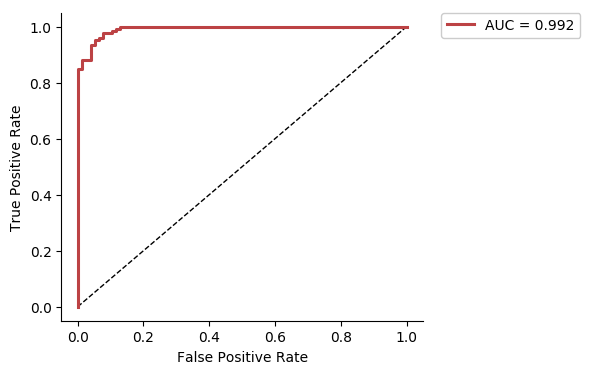

In [49]:
Image(out_folder+"roc.png")

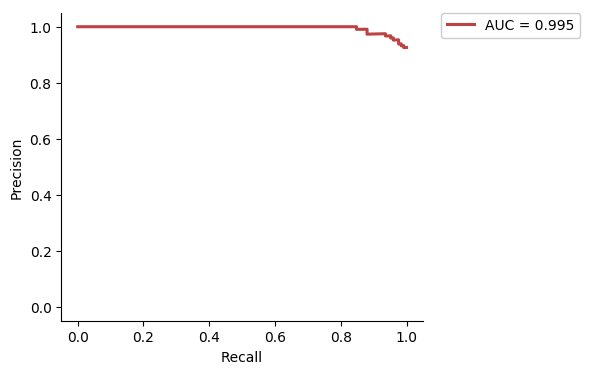

In [50]:
Image(out_folder+"prec.png")

In [51]:
activations = model.get_max_activations(data, "test")
logos = model.visualize_all_kernels(activations, data, out_folder)

FileNotFoundError: [Errno 2] No such file or directory: '/home/paperspace/miniconda3/lib/python3.6/site-packages/pysster/resources/motif/char-.png'